## Introduction

This notebook is a part of [series of blog posts](https://vishalbakshi.github.io/blog/#category=fastbookRAG) for a project I'm calling fastbookRAG where I'm trying to answer questions from the [fastbook](https://github.com/fastai/fastbook/tree/master) end-of-chapter Questionnaires using the following pipeline:

![fastbookRAG diagram](1.png)

This notebook establishes a baseline using semantic search (Cosine Similarity) for retrieval on chunks of the fastbook chapters covered in [Part 1 of the fastai course](https://course.fast.ai/) (1, 2, 4, 8, 9, 10, and 13).

The evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

The goal is to retrieve the context necessary to answer all questions. Currently, I manually assess answers, a role that will eventually be performed by LLMs in the final pipeline.

## Summary of Results

Here are the results from my experiments in this notebook---in general, the best performing semantic search method (80.31% Answer Rate overall) was retrieving the top-5 (by Cosine Similarity) 3-paragraph chunks:

|Chapter|CS_A (Top-1 1p)|CS_B (Top-3 1p)|CS_C (Top-5 1p)|CS_D (Top-1 3p)|CS_E (Top-3 3p)|CS_F (Top-5 3p)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|40% (12/30)|63.33% (19/30)|63.33% (19/30)|46.67% (14/30)|80% (24/30)|90% (27/30)|
|2|26.92% (7/26)|61.54% (16/26)|69.23% (18/26)|53.85% (14/26)|80.77% (21/26)|84.62% (22/26)|
|4|29.03% (9/31)|54.84% (17/31)|64.52% (20/31)|25.81% (8/31)|67.74% (21/31)|80.65% (25/31)|
|8|17.39% (4/23)|43.48% (10/23)|47.83% (11/23)|43.48% (10/23)|73.91% (17/23)|91.30% (21/23)|
|9|28.57% (8/28)|46.43% (13/28)|53.57% (15/28)|42.86% (12/28)|57.14% (16/28)|75% (21/28)|
|10|42.86% (9/21)|47.62% (10/21)|47.62% (10/21)|47.62% (10/21)|52.38% (11/21)|57.14% (12/21)|
|13|41.18% (14/34)|58.82% (20/34)|61.76% (21/34)|47.06% (16/34)|70.59% (24/34)|79.41% (27/34)|
|**All**|**32.64% (63/193)**|**54.40% (105/193)**|**59.07% (114/193)**|**43.52% (84/193)**|**69.43% (134/193)**|**80.31% (155/193)**|

## Experimental Setup

### Data Sources

- The freely available Jupyter Notebook-written [fastbook](https://github.com/fastai/fastbook/).

### Data Preprocessing

- Chunking strategy: Single or multiple paragraphs with corresponding headers.
- Rationale: Balances granular content with high-level context.
- Goal: Maintain lean, informative chunks for efficient retrieval.

### Database

I am using a tensor to store the text embeddings for chunks and queries.

## Methodology

### Why Cosine Similarity?

While keyword search approaches resulted in an Answer Rate of up to 76.7% overall (7 chapters) I think there is room for improvement. I expect that for some of the questions where keywords search did not retrieve appropriate context, semantic search will. Why? Because there exists chunks of context that contain the answer to a question without containing the exact keywords explicitly. After performing a question-by-question error analysis (for the 39 questions that none of the keyword search approaches retrieved sufficient context) I expect 23 of those questions (11% of the dataset overall) better suited for a semantic search-based context retrieval.

### Evaluation Set

My evaluation set consists of:

- _ Questionnaire questions.
- "Gold standard" solutions to the Questionnaire [published by fast.ai Leader Tanishq Abraham](https://forums.fast.ai/t/fastbook-chapter-1-questionnaire-solutions-wiki/65647) who says:

> my responses are based on what is supported by the chapter text

(Which is perfect for my retrieval task.)

### Evaluation Metrics

Metrics: **Score** and **Answer Rate**

The evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

While this is a straightforward pair of metrics, they do involve some judgment. After reading the retrieved context, I decide if it's enough to answer the question. A capable LLM should be able to make the same kind of judgment about whether the context is helpful or not.

## Results

Here are the names and descriptions of each full text search approach explored in this notebook. Top-n means the chunk(s) with the n-highest Cosine Similarity (CS).

|Name|Description|
|:-:|:-:|
|CS_A|Top-1 1-Paragraph Chunks
|CS_B|Top-3 1-Paragraph Chunks
|CS_C|Top-5 1-Paragraph Chunks
|CS_D|Top-1 3-Paragraph Chunks
|CS_E|Top-3 3-Paragraph Chunks
|CS_F|Top-5 3-Paragraph Chunks

### Best Approach per Chapter

The following table shows name, description and **Answer Rate** for the best semantic search approach for each Chapter.

CS_F (Top-5 3-paragraph Chunks) was the best performing approach for all chapters and overall.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
|1|CS_F|Top-5 3-Paragraph Chunks|90%|
|2|CS_F|Top-5 3-Paragraph Chunks|84.62%|
|4|CS_F|Top-5 3-Paragraph Chunks|80.65%|
|8|CS_F|Top-5 3-Paragraph Chunks|91.30%|
|9|CS_F|Top-5 3-Paragraph Chunks|75%|
|10|CS_F|Top-5 3-Paragraph Chunks|57.14%|
|13|CS_F|Top-5 3-Paragraph Chunks|79.41%|
|**All**|CS_F|Top-5 3-Paragraph Chunks|80.31%|

A couple observations:

- Chapter 1 had the highest Answer Rate overall (90%), as it did for the BM25 baselines with the same Answer Rate.
- Chapter 10 had the lowest Answer Rate overall (57.14%), as it did for the BM25 baselines. However, 57.14% is lower than the best BM25 Answer Rate for the chapter (61.9%).

### All Approaches for All Chapters

The following table shows the **Answer Rate** for all Cosine Similarity (CS) approaches for each chapter (where in the header, 1p = 1-paragraph chunks and 3p = 3-paragraph chunks).

|Chapter|CS_A (Top-1 1p)|CS_B (Top-3 1p)|CS_C (Top-5 1p)|CS_D (Top-1 3p)|CS_E (Top-3 3p)|CS_F (Top-5 3p)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|40% (12/30)|63.33% (19/30)|63.33% (19/30)|46.67% (14/30)|80% (24/30)|90% (27/30)|
|2|26.92% (7/26)|61.54% (16/26)|69.23% (18/26)|53.85% (14/26)|80.77% (21/26)|84.62% (22/26)|
|4|29.03% (9/31)|54.84% (17/31)|64.52% (20/31)|25.81% (8/31)|67.74% (21/31)|80.65% (25/31)|
|8|17.39% (4/23)|43.48% (10/23)|47.83% (11/23)|43.48% (10/23)|73.91% (17/23)|91.30% (21/23)|
|9|28.57% (8/28)|46.43% (13/28)|53.57% (15/28)|42.86% (12/28)|57.14% (16/28)|75% (21/28)|
|10|42.86% (9/21)|47.62% (10/21)|47.62% (10/21)|47.62% (10/21)|52.38% (11/21)|57.14% (12/21)|
|13|41.18% (14/34)|58.82% (20/34)|61.76% (21/34)|47.06% (16/34)|70.59% (24/34)|79.41% (27/34)|
|**All**|**32.64% (63/193)**|**54.40% (105/193)**|**59.07% (114/193)**|**43.52% (84/193)**|**69.43% (134/193)**|**80.31% (155/193)**|

A few observations when looking at the **Answer Rate** for each approach for each chapter, similar to the BM25 baselines:

- **Increasing the number of chunks retrieved generally improves the quality of information retrieved**:
  - For all chapters: CS_C >= CS_B >= CS_A and CS_F >= CS_E >= CS_D.
- **Increasing the chunk size generally improves the quality of information retrieved**:
  - For 6 out of 7 chapters: CS_D > CS_A, CS_E > CS_B, CS_F > CS_C
    - For Chapter 4: CS_D < CS_A.
- **Not all chapters behave the same**: For some Chapters, like chapter 10, increasing the number of 1-paragraph chunks retrieved from 3 to 5 did not improve the Answer Rate, while for other chapters it did.

### Question-Level Analysis

Looking at the question-level data offers some additional insights.

In [1]:
import pandas as pd
url = 'https://gist.githubusercontent.com/vishalbakshi/9e0dc5b83c9b02810099f53377ced4ba/raw/3860f7dac972f37cc84cd10e22184c2bfd8813a4/cs_all.csv'
df = pd.read_csv(url)
score_columns = df.filter(regex='_score$').columns
df['total_score'] = df[score_columns].sum(axis=1)

#### Distribution of Scores

Surprisingly, I have the exact same observations about this distribution as the BM25 baseline results:

- Bimodal Distribution
  - Approximately 50 questions (about 25% of the total) were successfully answered by all six full text search methods (a total score of `6`).
  - On the other hand, around 40 questions (about 20%) couldn't be answered by any method, resulting in a total score of `0`.
- Uniform Mid-Range Performance
  - Questions answered by 2, 3, 4, or 5 methods each accounted for 20-30 instances, showing a relatively even distribution in this middle range.
- Least Common Outcome
  - Only 10 questions were answered by just one method, making this the least frequent result.

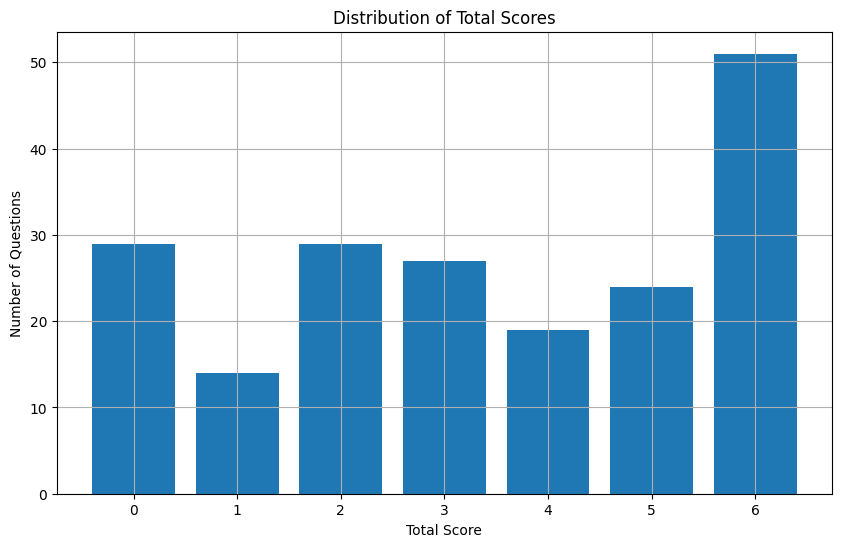

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

df['total_score'].hist(bins=range(0, 8), align='left', rwidth=0.8);

plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Number of Questions');

#### Average Score Per Question

On average, each question was answered by about 3 semantic search methods.

In [3]:
df['total_score'].describe()

,total_score
count,193.000000
mean,3.393782
std,2.153090
min,0.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,6.000000


#### Unanswered Questions

There were 29 questions for which none of the semantic search approaches retrieved the context needed to answer them.

In [4]:
no_answer = df.query("total_score == 0")[['chapter', 'question_number', 'question_text', 'answer']].drop_duplicates()
no_answer.shape

(29, 4)

#### Questions with 100% Answer Rate

There were 51 questions that were answered by all 6 semantic search methods.

In [5]:
all_answer = df.query("total_score == 6")[['chapter', 'question_number', 'question_text']].drop_duplicates()
all_answer.shape

(51, 3)

It's worth noting that semantic search successfully retrieved relevant context for the following two questions, where none of the full-text search methods were able to do so.

In [ ]:
all_answer.iloc[27]['question_text']

'""What is a categorical variable?""'

In [ ]:
all_answer.iloc[37]['question_text']

'""Why do we have to pass the vocabulary of the language model to the classifier data block?""'

Only 1 of the full text search methods retrieved relevant context for the following three questions where all semantic search methods were able to do so.

In [ ]:
all_answer.iloc[6]['question_text']

'""What is an ""architecture""?""'

In [ ]:
all_answer.iloc[24]['question_text']

'""Does sorting the movie biases give the same result as averaging overall movie ratings by movie? Why/why not?""'

In [ ]:
all_answer.iloc[41]['question_text']

'""What is a ""channel""?""'

**I've done a detailed analysis of questions where semantic search performed unanimously better than full text search (and vice versa) in [this notebook].**

### Results CSV

The retrieved contexts and my manually assigned scores for each question and semantic search baseline are available in [this public gist](https://gist.github.com/vishalbakshi/9e0dc5b83c9b02810099f53377ced4ba).

## Limitations

There are a number of limitations that I want to highlight in this work, the first and last two are also applicable to my full text search work:

- **Limited methods:** There are inumerable combinations of chunk strategies and top-n retrieval choices. I chose the six (1-paragraph/3-paragraph and Top-1/Top-3/Top-5) that seemed easy to implement, reasonable to accomplish in my desired timeline and reasonably provided me with a diverse set of results.
- **Limited scope**: I'm only considering the 193 questions in the end-of-chapter Questionnaires whose answer was explicitly in the fastbook text. There are endless questions about the topics covered in the fastbook. I only focused on the 7 chapters covered in Part 1 of the fastai course (as I am still in progress with Part 2). A more general-purpose QA task for deep learning and machine learning would likely require a different set of evals.
- **I only used one embedding model**: There models other than `BAAI/bge-small-en-v1.5`, some that create larger embeddings, that may yield better results.
- **I used my own judgment**: I had to use my judgment to determine whether the retrieved context was sufficient for answering the given question. This is a fuzzy evaluation method.
- **I used the official Questionnaire solutions**: There is room for interpretation when answering open-ended questions. I chose to strictly follow the "gold standard" answers provided in the course Forums.

## Future Work

Each of the limitations provides an opportunity for future work:

- Experiment with different chunking strategies and observe their impact on retrieval performance.
- Expanding the eval set to include more chapters and question types.
- Experiment with different embedding models.
- **Integrate an LLM to replace my own judgment in the pipeline** (something that I'll be doing as part of the broader fastbookRAG project).
- **Conducting a deep dive into error analysis** to understand why certain questions weren't answerable (something I'll do before I conduct any further experiments).
- **Removing questions from my evals that do not have explicit answers** in the chapter text (something I'll do before I conduct any further experiments).
- Developing my own set of standardized answers (with the use of an LLM) for each question to ensure consistency.

## Experiments

### Helper Functions

In [ ]:
#| code-fold: true
#| code-summary: "Show imports"
import sqlite3
import json
import re
import os
import pandas as pd, numpy as np
import requests
import torch.nn.functional as F

In [ ]:
#| code-fold: true
#| code-summary: "Show chunking code"
def get_chunks(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as file:
        notebook = json.load(file)

    chunks = []
    current_header = ""

    def add_chunk(content):
        if content.strip():
            chunks.append(f"{current_header}\n\n{content.strip()}")

    for cell in notebook['cells']:
        if cell['cell_type'] == 'markdown':
            content = ''.join(cell['source'])
            # see if the cell starts with a markdown header
            header_match = re.match(r'^(#+\s+.*?)$', content, re.MULTILINE)
            if header_match:
                # grab the header
                current_header = header_match.group(1)
                # add any content after the header in the same cell
                remaining_content = content[len(current_header):].strip()
                if remaining_content:
                    # split content into paragraphs
                    paragraphs = re.split(r'\n\s*\n', remaining_content)
                    # append the paragraph to the list of chunks
                    for paragraph in paragraphs:
                        add_chunk(paragraph)
            else:
                # split content into paragraphs
                paragraphs = re.split(r'\n\s*\n', content)
                # append the paragraph to the list of chunks
                for paragraph in paragraphs:
                    add_chunk(paragraph)
        elif cell['cell_type'] == 'code':
          code_content = '```python\n' + ''.join(cell['source']) + '\n```'

          # include the output of the code cell
          output_content = ''
          if 'outputs' in cell and cell['outputs']:
              for output in cell['outputs']:
                  if 'text' in output:
                      output_content += ''.join(output['text'])
                  elif 'data' in output and 'text/plain' in output['data']:
                      output_content += ''.join(output['data']['text/plain'])

          # combine code and output in the same chunk
          combined_content = code_content + '\n\nOutput:\n' + output_content if output_content else code_content
          add_chunk(combined_content)

    def filter_chunks(chunks, exclude_headers=["Questionnaire", "Further Research"]):
      filtered_chunks = []
      for chunk in chunks:
          lines = chunk.split('\n')
          # check if the first line (header) is in the exclude list
          if not any(header in lines[0] for header in exclude_headers):
              filtered_chunks.append(chunk)
      return filtered_chunks

    return filter_chunks(chunks)

### Data Preprocessing

You can download the notebooks from the [fastbook repo](https://github.com/fastai/fastbook/tree/master) or run the following cell to download them.

In [ ]:
urls = {
    '01_intro.ipynb': 'https://drive.google.com/uc?export=view&id=1mmBjFH_plndPBC4iRZHChfMazgBxKK4_',
    '02_production.ipynb': 'https://drive.google.com/uc?export=view&id=1Cf5QHthHy1z13H0iu3qrzAWgquCfqVHk',
    '04_mnist_basics.ipynb': 'https://drive.google.com/uc?export=view&id=113909_BNulzyLIKUNJHdya0Hhoqie30I',
    '08_collab.ipynb': 'https://drive.google.com/uc?export=view&id=1BtvStgFjUtvtqbSZNrL7Y2N-ey3seNZU',
    '09_tabular.ipynb': 'https://drive.google.com/uc?export=view&id=1rHFvwl_l-AJLg_auPjBpNrOgG9HDnfqg',
    '10_nlp.ipynb': 'https://drive.google.com/uc?export=view&id=1pg1pH7jMMElzrXS0kBBz14aAuDsi2DEP',
    '13_convolutions.ipynb': 'https://drive.google.com/uc?export=view&id=19P-eEHpAO3WrOvdxgXckyhHhfv_R-hnS'
}

def download_file(url, filename):
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the file in write-binary mode
        with open(filename, 'wb') as file:
            # Write the content of the response to the file
            file.write(response.content)
        print(f"File downloaded successfully: {filename}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

for fname, url in urls.items():
  download_file(url, fname)

I have seven notebooks in total. I'll start by using `get_chunks` to split the notebook content into paragraphs (with the corresponding header).

In [ ]:
#| code-fold: true
#| code-summary: "Show the dict w/ notebook filenames"

nbs = {
    '1': '01_intro.ipynb',
    '2': '02_production.ipynb',
    '4': '04_mnist_basics.ipynb',
    '8': '08_collab.ipynb',
    '9': '09_tabular.ipynb',
    '10': '10_nlp.ipynb',
    '13': '13_convolutions.ipynb'
}

In [ ]:
# chunking each notebook
data = {}

for chapter, nb in nbs.items():
  data[chapter] = get_chunks(nb)

I'll print out the length of the total chunks so I get a sense of how many unique chunks there are:

In [ ]:
total_chunks = 0
for chapter, chunks in data.items():
  print(chapter, len(chunks))
  total_chunks += len(chunks)

assert total_chunks == 1967 # 1-paragraph chunks

1 307
2 227
4 433
8 157
9 387
10 190
13 266


### Embed the Data

I'll create text embeddings for the chunks using a popular embedding model.

In [ ]:
!pip install sentence-transformers -Uqq
from sentence_transformers import SentenceTransformer
emb_model = SentenceTransformer("BAAI/bge-small-en-v1.5")

In [ ]:
data_embs = {}

for chapter, chunks in data.items():
  data_embs[chapter] = emb_model.encode(chunks, convert_to_tensor=True)

In [ ]:
import pickle

with open('data_embs.pkl', 'rb') as f:
    data_embs = pickle.load(f)

In [ ]:
for chapter, embs in data_embs.items():
  print(chapter, embs.shape)

1 torch.Size([307, 384])
2 torch.Size([227, 384])
4 torch.Size([433, 384])
8 torch.Size([157, 384])
9 torch.Size([387, 384])
10 torch.Size([190, 384])
13 torch.Size([266, 384])


### Load and Embed the Question Texts

I have saved each chapter's questions and answers in [this gist](https://gist.github.com/vishalbakshi/fa90ec0172924091fa97bb0971b3a713). Note that the total number of questions (193) is different than the total number of questions for the keyword searh evals (202) since after error analysis I deemed that some questions were unanswerable using the chapter text (they were ambiguously worded, were exercises meant to be done by the reader, and/or the chapter text did not contain enough relevant explanatory text to answer the question).

In [ ]:
import pandas as pd
url = 'https://gist.githubusercontent.com/vishalbakshi/fa90ec0172924091fa97bb0971b3a713/raw/b5e801c4d887edebc8de4097b44eff49d15d6b49/fastbookRAG_evals_CS.csv'
questions = pd.read_csv(url)
questions.head()

,chapter,question_number,question_text,answer,is_answerable
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1


In [ ]:
questions.shape

(193, 5)

In [ ]:
q_embs = {}

for chapter, _ in data.items():
  qs = questions[questions['chapter'] == int(chapter)].reset_index()['question_text']
  q_embs[chapter] = emb_model.encode(qs, convert_to_tensor=True)
  print(chapter, qs.shape, q_embs[chapter].shape)

1 (30,) torch.Size([30, 384])
2 (26,) torch.Size([26, 384])
4 (31,) torch.Size([31, 384])
8 (23,) torch.Size([23, 384])
9 (28,) torch.Size([28, 384])
10 (21,) torch.Size([21, 384])
13 (34,) torch.Size([34, 384])


In [ ]:
with open('q_embs.pkl', 'rb') as f:
    q_embs = pickle.load(f)

In [ ]:
for c, e in q_embs.items():
  print(c,e.shape)

1 torch.Size([30, 384])
2 torch.Size([26, 384])
4 torch.Size([31, 384])
8 torch.Size([23, 384])
9 torch.Size([28, 384])
10 torch.Size([21, 384])
13 torch.Size([34, 384])


### CS_A: Top-1 1-Paragraph Chunks

In this approach, I'll select the top-1 retrieved context (1-paragraph chunk) for each question's keywords and calculate the **Answer Rate**. As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

I needed to think through this a bit so I'll walk through my process. I start by adding a unit axis to the data and questions' embeddings. This prepares it for broadcasting. Here's an image showing the concept:

![Broadcasting data and questions embeddings](2.png)

In [ ]:
data_embs['1'].unsqueeze(1).shape, q_embs['1'].unsqueeze(0).shape

(torch.Size([307, 1, 384]), torch.Size([1, 30, 384]))

I can either add the unit axis as the first or second position of the embeddings and get the same result after passing them through `F.cosine_similarity`:

In [ ]:
res1 = F.cosine_similarity(q_embs['1'].unsqueeze(1), data_embs['1'].unsqueeze(0), dim=2)

In [ ]:
res2 = F.cosine_similarity(q_embs['1'].unsqueeze(0), data_embs['1'].unsqueeze(1), dim=2)

In [ ]:
res1.shape, res2.T.shape

(torch.Size([30, 307]), torch.Size([30, 307]))

In [ ]:
(res1 == res2.T).float().mean(), (res1.T == res2).float().mean()

(tensor(1.), tensor(1.))

I calculate the cosine similarity between the Chapter 1 questions and 1-paragraph chunks, and then sort them in descending order. I take the top-1 highest cosine similarity chunk as the retrieved context for each question.

In [ ]:
vals, idxs = F.cosine_similarity(q_embs['1'].unsqueeze(1), data_embs['1'].unsqueeze(0), dim=2).sort(descending=True)
top_1_idxs = idxs[:, 0]

In [ ]:
top_1_idxs.shape, top_1_idxs[:5]

(torch.Size([30]), tensor([ 4,  7, 15, 20, 16]))

In [ ]:
top_1_chunks = [data['1'][idx] for idx in top_1_idxs]

In [ ]:
len(top_1_chunks)

30

The context retrieved for the first question is correct:

In [ ]:
top_1_chunks[0]

'## Deep Learning Is for Everyone\n\n```asciidoc\n[[myths]]\n.What you don\'t need to do deep learning\n[options="header"]\n|======\n| Myth (don\'t need) | Truth\n| Lots of math | Just high school math is sufficient\n| Lots of data | We\'ve seen record-breaking results with <50 items of data\n| Lots of expensive computers | You can get what you need for state of the art work for free\n|======\n```'

I'll now loop through each chapter, in order from 1 to 13, and retrieve the top-1 1-paragraph chunk based on cosine similarity between the chapter questions and the chapter chunks:

In [ ]:
results = []
for chapter in ['1', '2', '4', '8', '9', '10', '13']:
  _, idxs = F.cosine_similarity(q_embs[chapter].unsqueeze(1), data_embs[chapter].unsqueeze(0), dim=2).sort(descending=True)
  top_1_idxs = idxs[:, 0]
  top_1_chunks = [data[chapter][idx] for idx in top_1_idxs]
  results.extend(top_1_chunks)

I should have 193 chunks retrieved (which I do!)

In [ ]:
assert len(results) == 193

I'll add the retrieved contexts to my evals and export it to evaluate it.

In [ ]:
cs_a = questions.copy()
cs_a['cs_a_context'] = results
cs_a.head()

,chapter,question_number,question_text,answer,is_answerable,cs_a_context
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1,## Deep Learning Is for Everyone\n\n```asciido...
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1,## Deep Learning Is for Everyone\n\nHere's a l...
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1,## Neural Networks: A Brief History\n\nRosenbl...
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1,## Neural Networks: A Brief History\n\nIn fact...
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1,## Neural Networks: A Brief History\n\nAn MIT ...


In [ ]:
cs_a.to_csv('cs_a.csv', index=False)

#### Results

Here is the **Answer Rate** (by chapter and overall). As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
1|CS_A|Top-1 1-paragraph chunks|40% (12/30)|
2|CS_A|Top-1 1-paragraph chunks|26.92% (7/26)|
4|CS_A|Top-1 1-paragraph chunks|29.03% (9/31)|
8|CS_A|Top-1 1-paragraph chunks|17.39% (4/23)|
9|CS_A|Top-1 1-paragraph chunks|28.57% (8/28)|
10|CS_A|Top-1 1-paragraph chunks|42.86% (9/21)|
13|CS_A|Top-1 1-paragraph chunks|41.18% (14/34)|
**All**|**CS_A**|**Top-1 1-paragraph chunks**|**32.64% (63/193)**|

### CS_B: Top-3 1-Paragraph Chunks

In this approach, I'll select the top-3 retrieved context (1-paragraph chunks) for each question and calculate the **Answer Rate**. As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

In [ ]:
results = []
for chapter in ['1', '2', '4', '8', '9', '10', '13']:
  _, idxs = F.cosine_similarity(q_embs[chapter].unsqueeze(1), data_embs[chapter].unsqueeze(0), dim=2).sort(descending=True)
  top_3_chunks = ['\n\n'.join([data[chapter][i] for i in row[0:3].tolist()]) for row in idxs]
  results.extend(top_3_chunks)

In [ ]:
assert len(results) == 193

In [ ]:
cs_b = questions.copy()
cs_b['cs_b_context'] = results
cs_b.head()

,chapter,question_number,question_text,answer,is_answerable,cs_b_context
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1,## Deep Learning Is for Everyone\n\n```asciido...
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1,## Deep Learning Is for Everyone\n\nHere's a l...
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1,## Neural Networks: A Brief History\n\nRosenbl...
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1,## Neural Networks: A Brief History\n\nIn fact...
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1,## Neural Networks: A Brief History\n\nAn MIT ...


In [ ]:
cs_b.to_csv('cs_b.csv', index=False)

#### Results

Here is the **Answer Rate** (by chapter and overall). As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
1|CS_B|Top-3 1-paragraph chunks|63.33% (19/30)|
2|CS_B|Top-3 1-paragraph chunks|61.54% (16/26)|
4|CS_B|Top-3 1-paragraph chunks|54.84% (17/31)|
8|CS_B|Top-3 1-paragraph chunks|43.48% (10/23)|
9|CS_B|Top-3 1-paragraph chunks|46.43% (13/28)|
10|CS_B|Top-3 1-paragraph chunks|47.62% (10/21)|
13|CS_B|Top-3 1-paragraph chunks|58.82% (20/34)|
**All**|**CS_B**|**Top-3 1-paragraph chunks**|**54.40% (105/193)**|

### CS_C: Top-5 1-Paragraph Chunks

In this approach, I'll select the top-5 retrieved context (1-paragraph chunks) for each question and calculate the **Answer Rate**. As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

In [ ]:
results = []
for chapter in ['1', '2', '4', '8', '9', '10', '13']:
  _, idxs = F.cosine_similarity(q_embs[chapter].unsqueeze(1), data_embs[chapter].unsqueeze(0), dim=2).sort(descending=True)
  top_5_chunks = ['\n\n'.join([data[chapter][i] for i in row[0:5].tolist()]) for row in idxs]
  results.extend(top_5_chunks)

In [ ]:
assert len(results) == 193

In [ ]:
cs_c = questions.copy()
cs_c['cs_c_context'] = results
cs_c.head()

,chapter,question_number,question_text,answer,is_answerable,cs_c_context
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1,## Deep Learning Is for Everyone\n\n```asciido...
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1,## Deep Learning Is for Everyone\n\nHere's a l...
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1,## Neural Networks: A Brief History\n\nRosenbl...
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1,## Neural Networks: A Brief History\n\nIn fact...
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1,## Neural Networks: A Brief History\n\nAn MIT ...


In [ ]:
cs_c.to_csv('cs_c.csv', index=False)

#### Results

Here is the **Answer Rate** (by chapter and overall). As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
1|CS_C|Top-5 1-paragraph chunks|63.33% (19/30)|
2|CS_C|Top-5 1-paragraph chunks|69.23% (18/26)|
4|CS_C|Top-5 1-paragraph chunks|64.52% (20/31)|
8|CS_C|Top-5 1-paragraph chunks|47.83% (11/23)|
9|CS_C|Top-5 1-paragraph chunks|53.57% (15/28)|
10|CS_C|Top-5 1-paragraph chunks|47.62% (10/21)|
13|CS_C|Top-5 1-paragraph chunks|61.76% (21/34)|
**All**|**CS_C**|**Top-5 1-paragraph chunks**|**59.07% (114/193)**|

### CS_D: Top-1 3-Paragraph Chunks

I now want to increase the chunk size (to 3 paragraphs per chunk). I do this by iterating over the 1-paragraph chunks in groups of three, removing the header from the 2nd and 3rd chunk in each triplet and then concatenating the three chunks into new 3-paragraph chunks.

In [ ]:
def combine_chunks(chunks, num_p=3):
    combined_chunks = []
    current_header = None
    current_group = []

    for chunk in chunks:
        # Extract header from chunk
        header = chunk.split('\n\n')[0]

        if header != current_header:
            if len(current_group) > 1:  # Only add if group has content besides header
                # Add current group to combined chunks if header changes
                combined_chunks.append('\n\n'.join(current_group))
            # Update current header
            current_header = header
            # Start new group with header and content of current chunk
            current_group = [header, chunk.split('\n\n', 1)[1] if len(chunk.split('\n\n')) > 1 else '']
        else:
            if len(current_group) < num_p + 1:  # +1 to account for header
                # Add chunk content (without header) to current group
                current_group.append(chunk.split('\n\n', 1)[1] if len(chunk.split('\n\n')) > 1 else '')

            if len(current_group) == num_p + 1:  # +1 to account for header
                # Add full group to combined chunks
                combined_chunks.append('\n\n'.join(current_group))
                # Reset current group, keeping the header
                current_group = [current_header]

    if len(current_group) > 1:  # Only add if group has content besides header
        # Add any remaining group to combined chunks
        combined_chunks.append('\n\n'.join(current_group))

    return combined_chunks

In [ ]:
data_3p = {}

for chapter, chunks in data.items():
  data_3p[chapter] = combine_chunks(chunks, num_p=3)

In [ ]:
total_chunks = 0

for chapter, chunks in data_3p.items():
  print(chapter, len(chunks))
  total_chunks += len(chunks)

assert total_chunks == 713

1 112
2 84
4 152
8 58
9 141
10 70
13 96


Since I have new chunks of data (3-paragraphs each) I have to re-calculate the embeddings:

In [ ]:
data_3p_embs = {}

for chapter, chunks in data_3p.items():
  data_3p_embs[chapter] = emb_model.encode(chunks, convert_to_tensor=True)

In [ ]:
for chapter, embs in data_3p_embs.items():
  print(chapter, embs.shape)

1 torch.Size([112, 384])
2 torch.Size([84, 384])
4 torch.Size([152, 384])
8 torch.Size([58, 384])
9 torch.Size([141, 384])
10 torch.Size([70, 384])
13 torch.Size([96, 384])


In [ ]:
results = []
for chapter in ['1', '2', '4', '8', '9', '10', '13']:
  _, idxs = F.cosine_similarity(q_embs[chapter].unsqueeze(1), data_3p_embs[chapter].unsqueeze(0), dim=2).sort(descending=True)
  top_1_idxs = idxs[:, 0]
  top_1_chunks = [data_3p[chapter][idx] for idx in top_1_idxs]
  results.extend(top_1_chunks)

In [ ]:
assert len(results) == 193

In [ ]:
cs_d = questions.copy()
cs_d['cs_d_context'] = results
cs_d.head()

,chapter,question_number,question_text,answer,is_answerable,cs_d_context
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1,## Deep Learning Is for Everyone\n\nA lot of p...
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1,## Deep Learning Is for Everyone\n\nDeep learn...
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1,## Neural Networks: A Brief History\n\n<img al...
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1,## Neural Networks: A Brief History\n\nIn fact...
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1,## Neural Networks: A Brief History\n\nIn the ...


In [ ]:
cs_d.to_csv('cs_d.csv', index=False)

#### Results

Here is the **Answer Rate** (by chapter and overall). As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
1|CS_D|Top-1 3-paragraph chunks|46.67% (14/30)|
2|CS_D|Top-1 3-paragraph chunks|53.85% (14/26)|
4|CS_D|Top-1 3-paragraph chunks|25.81% (8/31)|
8|CS_D|Top-1 3-paragraph chunks|43.48% (10/23)|
9|CS_D|Top-1 3-paragraph chunks|42.86% (12/28)|
10|CS_D|Top-1 3-paragraph chunks|47.62% (10/21)|
13|CS_D|Top-1 3-paragraph chunks|47.06% (16/34)|
**All**|**CS_D**|**Top-1 3-paragraph chunks**|**43.52% (84/193)**|

### CS_E: Top-3 3-Paragraph Chunks

In [ ]:
results = []
for chapter in ['1', '2', '4', '8', '9', '10', '13']:
  _, idxs = F.cosine_similarity(q_embs[chapter].unsqueeze(1), data_3p_embs[chapter].unsqueeze(0), dim=2).sort(descending=True)
  top_3_chunks = ['\n\n'.join([data_3p[chapter][i] for i in row[0:3].tolist()]) for row in idxs]
  results.extend(top_3_chunks)

In [ ]:
assert len(results) == 193

In [ ]:
cs_e = questions.copy()
cs_e['cs_e_context'] = results
cs_e.head()

,chapter,question_number,question_text,answer,is_answerable,cs_e_context
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1,## Deep Learning Is for Everyone\n\nA lot of p...
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1,## Deep Learning Is for Everyone\n\nDeep learn...
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1,## Neural Networks: A Brief History\n\n<img al...
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1,## Neural Networks: A Brief History\n\nIn fact...
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1,## Neural Networks: A Brief History\n\nIn the ...


In [ ]:
cs_e.to_csv('cs_e.csv', index=False)

#### Results

Here is the **Answer Rate** (by chapter and overall). As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
1|CS_E|Top-3 3-paragraph chunks|80% (24/30)|
2|CS_E|Top-3 3-paragraph chunks|80.77% (21/26)|
4|CS_E|Top-3 3-paragraph chunks|67.74% (21/31)|
8|CS_E|Top-3 3-paragraph chunks|73.91% (17/23)|
9|CS_E|Top-3 3-paragraph chunks|57.14% (16/28)|
10|CS_E|Top-3 3-paragraph chunks|52.38% (11/21)|
13|CS_E|Top-3 3-paragraph chunks|70.59% (24/34)|
**All**|**CS_E**|**Top-3 3-paragraph chunks**|**69.43% (134/193)**|

### CS_F: Top-5 3-Paragraph Chunks

In [ ]:
results = []
for chapter in ['1', '2', '4', '8', '9', '10', '13']:
  _, idxs = F.cosine_similarity(q_embs[chapter].unsqueeze(1), data_3p_embs[chapter].unsqueeze(0), dim=2).sort(descending=True)
  top_5_chunks = ['\n\n'.join([data_3p[chapter][i] for i in row[0:5].tolist()]) for row in idxs]
  results.extend(top_5_chunks)

In [ ]:
assert len(results) == 193

In [ ]:
cs_f = questions.copy()
cs_f['cs_f_context'] = results
cs_f.head()

,chapter,question_number,question_text,answer,is_answerable,cs_f_context
0,1,1,"""""Do you need these for deep learning?nn- Lots...","""""Lots of math - False\nLots of data - False\n...",1,## Deep Learning Is for Everyone\n\nA lot of p...
1,1,2,"""""Name five areas where deep learning is now t...","""""Any five of the following:\nNatural Language...",1,## Deep Learning Is for Everyone\n\nDeep learn...
2,1,3,"""""What was the name of the first device that w...","""""Mark I perceptron built by Frank Rosenblatt""""",1,## Neural Networks: A Brief History\n\n<img al...
3,1,4,"""""Based on the book of the same name, what are...","""""A set of processing units\nA state of activa...",1,## Neural Networks: A Brief History\n\nIn fact...
4,1,5,"""""What were the two theoretical misunderstandi...","""""In 1969, Marvin Minsky and Seymour Papert de...",1,## Neural Networks: A Brief History\n\nIn the ...


In [ ]:
cs_f.to_csv('cs_f.csv', index=False)

#### Results

Here is the **Answer Rate** (by chapter and overall). As a reminder, the evaluation metric for each question, that I'm simply calling **score**, is binary: can the retrieved context answer the question (`1`) or not (`0`)? The evaluation metric across a set of questions, which I'm calling the **Answer Rate**, is the mean score for those questions.

|Chapter|Name|Description|Answer Rate|
|:-:|:-:|:-:|:-:|
1|CS_F|Top-5 3-paragraph chunks|90% (27/30)|
2|CS_F|Top-5 3-paragraph chunks|84.62% (22/26)|
4|CS_F|Top-5 3-paragraph chunks|80.65% (25/31)|
8|CS_F|Top-5 3-paragraph chunks|91.30% (21/23)|
9|CS_F|Top-5 3-paragraph chunks|75% (21/28)|
10|CS_F|Top-5 3-paragraph chunks|57.14% (12/21)|
13|CS_F|Top-5 3-paragraph chunks|79.41% (27/34)|
**All**|**CS_F**|**Top-5 3-paragraph chunks**|**80.31% (155/193)**|